EXPLORATORY DATA ANALYSIS ON THE AUTOMOBILE INDUSTRY:
UNVEILING TRENDS AND INSIGHTS

In this analysis, I delve into the automobile dataset to bring out insightful trends and patterns. I started by tidying up the data, addressing missing values using the mode and median. After crafting new informative columns through feature engineering, I embarked on an exploratory journey, digging deep into statistics, relationships between variables, their distributions, and segmenting by specific categories like body style.

In [39]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('dataset_automobile.csv')

# show first five rows
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [40]:
# hide all warning messages:
import warnings 
warnings.filterwarnings('ignore')

In [41]:
# checking the data types of each column
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

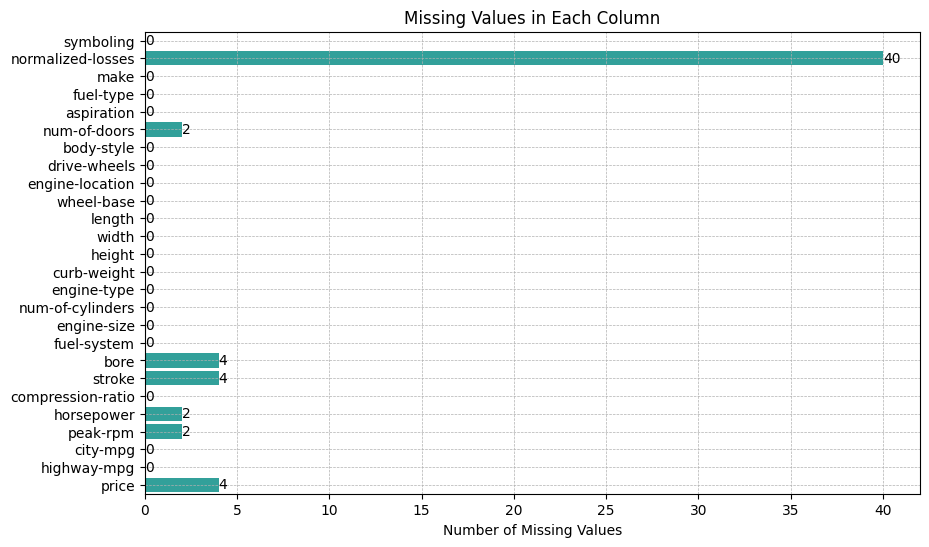

In [42]:
# replace '?' with nan
data.replace('?', np.nan, inplace=True)

# count the number of missing values in each column
missing_values = data.isna().sum()

# Plotting the Missing Values
plt.figure(figsize=(10,6))
bars=sns.barplot(x=missing_values, y=missing_values.index, color='lightseagreen')
plt.xlabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

for bar in bars.patches:
    plt.text(bar.get_width(), 
             bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.0f}', 
             va='center')

plt.show()

In [43]:
# Numerical Columns: replace 'nan' values with MEAN

avg_norloss = data['normalized-losses'].astype('float').median(axis=0) 
data['normalized-losses'].replace(np.nan, avg_norloss, inplace=True) 

avg_bore = data['bore'].astype('float').median(axis=0) 
data['bore'].replace(np.nan, avg_bore, inplace=True)

avg_stroke = data['stroke'].astype('float').median(axis=0) 
data['stroke'].replace(np.nan, avg_stroke, inplace=True)

avg_horsepower = data['horsepower'].astype('float').median(axis=0) 
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm = data['peak-rpm'].astype('float').median(axis=0) 
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

avg_price = data['price'].astype('float').median(axis=0) 
data['price'].replace(np.nan, avg_price, inplace=True)

In [44]:
# Categorical Columns: replace 'nan' values with MODE

mod_doors = data['num-of-doors'].mode()[0]
data['num-of-doors'].replace(np.nan, mod_doors, inplace=True)

In [45]:
# Convert Data Types
data[['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']] = data[['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']].astype('float')

Add New Features

In [46]:
# Create 'Power-to-Weight Ratio' feature
data['power-to-weight-ratio'] = data['horsepower'] / data['curb-weight']

# Create 'Fuel Efficiency' feature (average of city and highway mpg)
data['fuel-efficiency'] = (data['city-mpg'] + data['highway-mpg']) / 2

Exploratory Data Analysis

In [47]:
# 1. Descriptive Statistics
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power-to-weight-ratio,fuel-efficiency
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,120.627451,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.328676,3.258922,10.148137,104.132353,5126.715686,25.240196,30.769608,13148.127451,0.040065,28.004902
std,1.239035,31.880912,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271344,0.311781,3.981000,39.624060,478.126988,6.551513,6.898337,7898.645692,0.009584,6.676551
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.019936,15.000000
25%,0.000000,101.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.750000,0.034188,22.375000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000,0.037806,27.000000
75%,2.000000,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.000000,0.044529,32.375000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,0.085561,51.500000


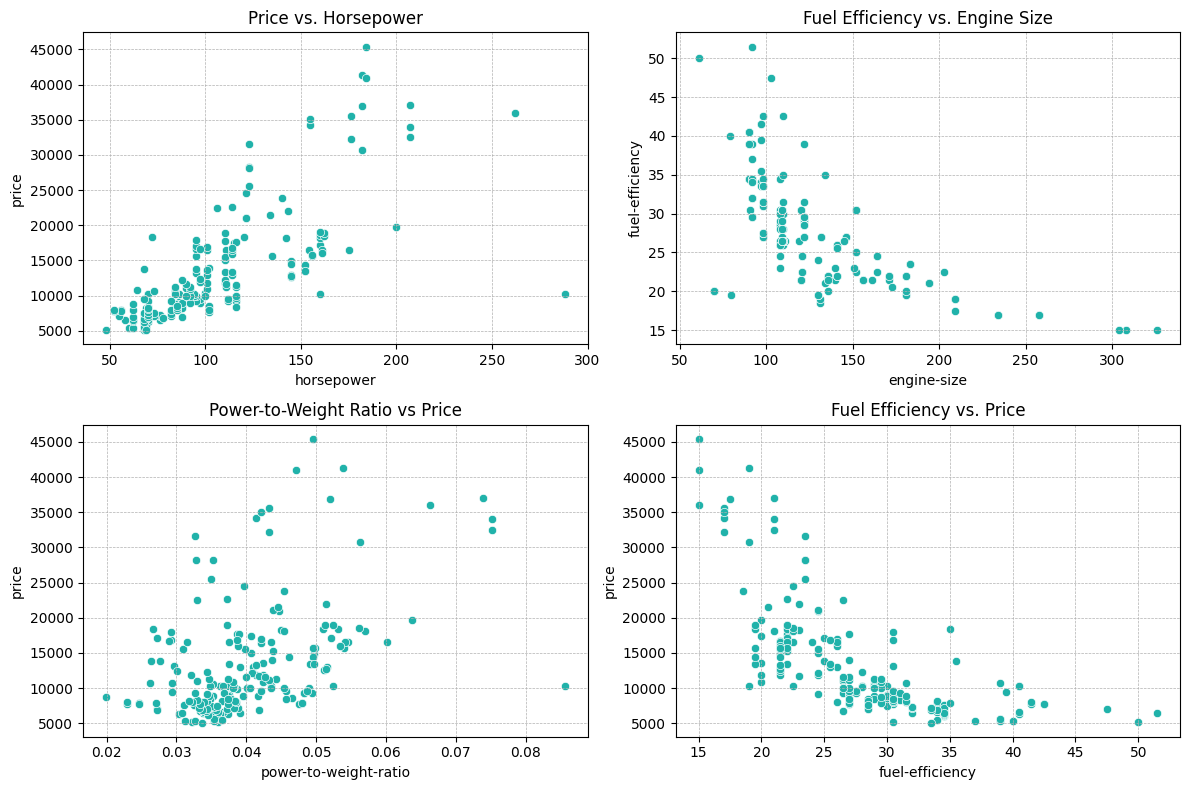

In [48]:
# 2. Explore Relationships Between Variables:
plt.figure(figsize=(12, 8))

# Price vs. Horsepower
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='horsepower', y='price', color='lightseagreen')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Price vs. Horsepower')

# Fuel Efficiency vs. Engine Size
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='engine-size', y='fuel-efficiency', color='lightseagreen')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Fuel Efficiency vs. Engine Size')

# Power to Weight vs. Price
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='power-to-weight-ratio', y='price', color='lightseagreen')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Power-to-Weight Ratio vs Price')

# Fuel Efficiency vs. Price
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='fuel-efficiency', y='price', color='lightseagreen')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Fuel Efficiency vs. Price')

plt.tight_layout()
plt.show()

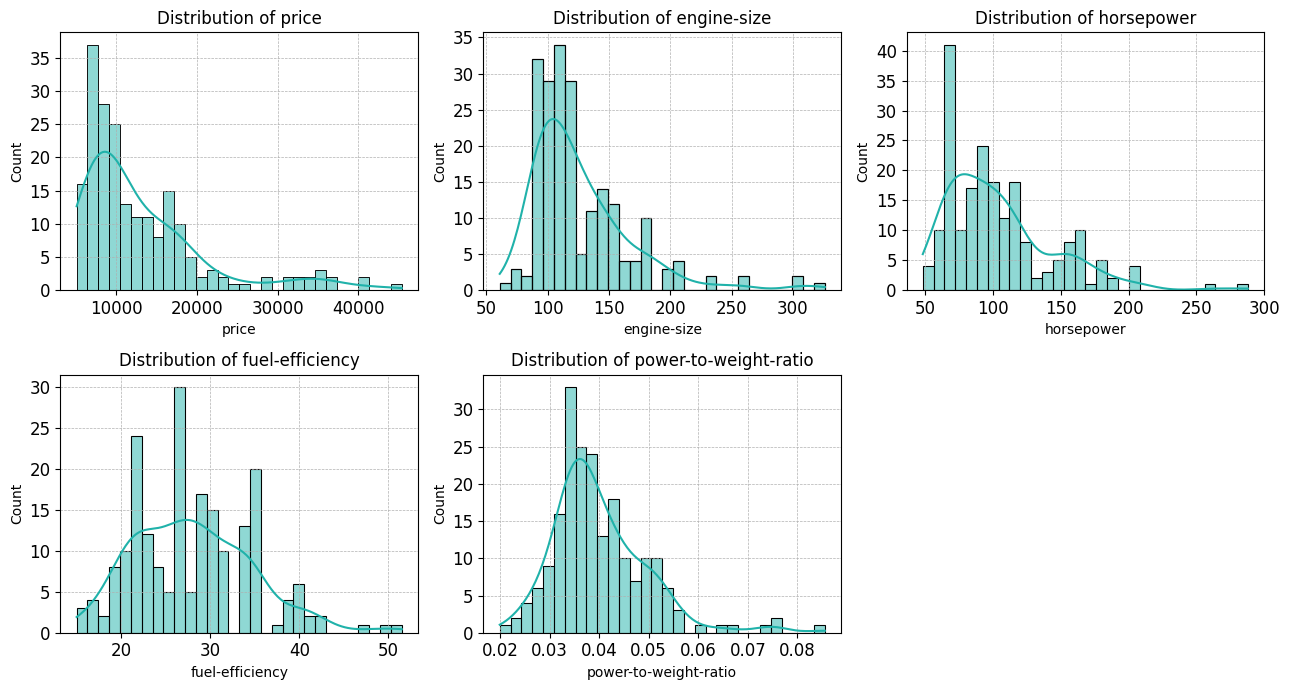

In [49]:
# 3. Examine the Distributions of Key Variables

# List of key variables to visualize
key_vars = [
    'price', 'engine-size', 'horsepower', 
    'fuel-efficiency', 'power-to-weight-ratio'
    ]

# Plotting histograms for the key variables
plt.figure(figsize=(13, 7))
for i, col in enumerate(key_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='lightseagreen')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

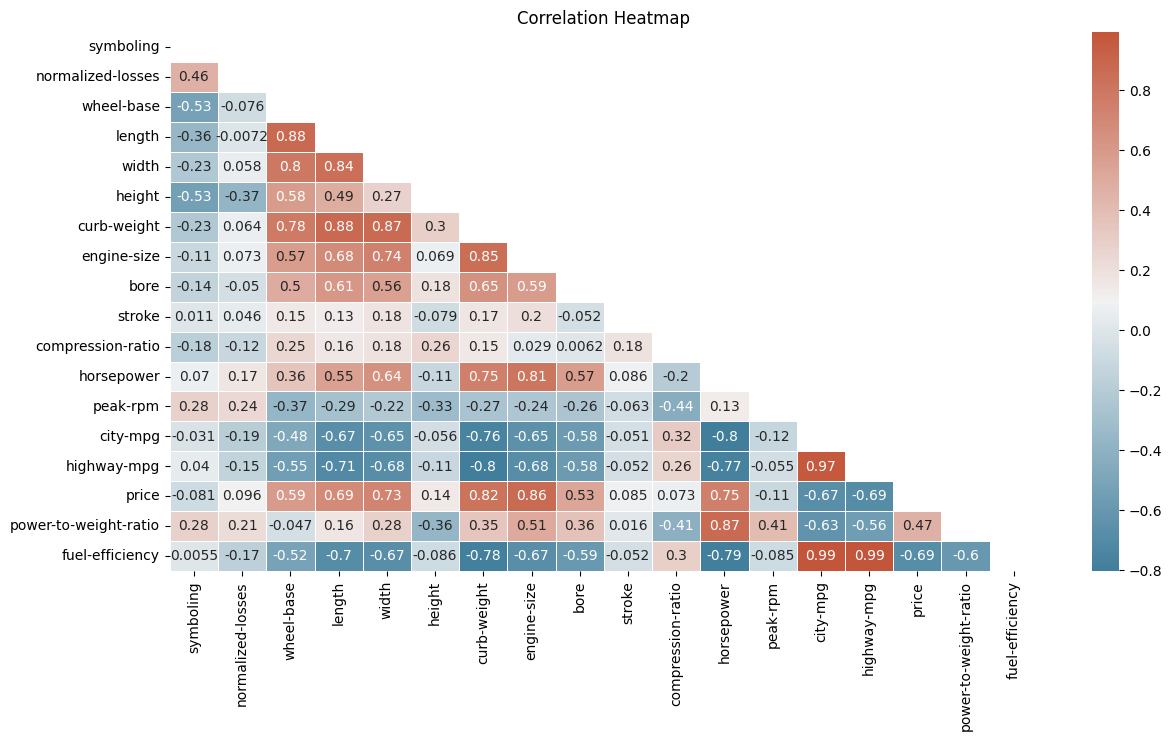

In [50]:
# 4. Correlation or Patterns in the Dataset
# Calculate the correlation matrix
corr = data.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(14, 7))
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

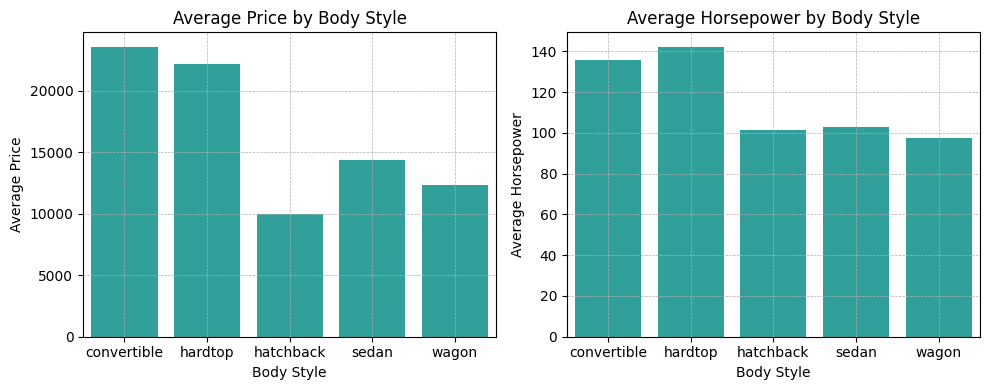

In [51]:
#5. Segmentation Analysis: Average Price and Horsepower by Body Style:

# Define the variables to plot
variables = ['price', 'horsepower']
titles = ['Average Price by Body Style', 'Average Horsepower by Body Style']
y_labels = ['Average Price', 'Average Horsepower']

# Grouping by 'body-style' and computing average price and horsepower
segmented = data.groupby('body-style')[['price', 'horsepower']].mean()
segmented = segmented.reset_index()

# Creating the Bar Plot
plt.figure(figsize=(10, 4))
for i, var in enumerate(variables):
    plt.subplot(1, 2, i+1)
    sns.barplot(x='body-style', y=var, data=segmented, color='lightseagreen')
    plt.title(titles[i])
    plt.xlabel('Body Style')
    plt.ylabel(y_labels[i])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

CONCLUSION

In the exploration of the automobile dataset, I unearthed several intriguing insights:
	Price and Performance: Cars with higher horsepower generally command higher prices. This suggests consumers might value power when making purchase decisions.
	Fuel Efficiency: Cars with larger engines tend to be less fuel-efficient. This highlights a trade-off between power and fuel economy.
	Car Body Styles: Convertibles and hardtops, which are typically seen as luxury or sporty options, are priced higher and have more horsepower on average. In contrast, hatchbacks are more budget-friendly and have modest performance attributes.
	Missing Data: We identified and addressed missing data points, ensuring our analysis was based on a complete and robust dataset.
	Feature Engineering: New features like 'power-to-weight-ratio' and 'fuel-efficiency' were introduced, providing fresh perspectives on car performance and economy.
In essence, this analysis underscores the relationship between a car's attributes and its market price, with performance and body style being pivotal factors.

